In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
from diffpy.pdfgui.tui import LoadProject
from diffpy.pdfgui.control.pdfguicontrol import PDFGuiControl
from diffpy.pdffit2.pdffit2 import calculationError

from IPython.display import clear_output
# from tqdm.auto import tqdm
import time

In [2]:
%matplotlib widget

In [3]:
def tqdm_sleep_sec(t, message='Sleep'):
    import datetime
    from tqdm import tqdm
    now = datetime.datetime.now()
    print(f'\nSleep for a while: {t} seconds.')
    print(f'Waiting starts at {now}')
    for i in tqdm(range(0,100), desc=message):
        time.sleep(t/100)

## Load a pre-defined PDFGui project file (.ddp) using diffpy.pdfgui.tui.LoadProject

In [4]:
fn = '/Users/cheng-hunglin/Documents/Data_LDRD/Cs_x-Pb_y-B_z.ddp'
ddp = LoadProject(fn)

## Check the fitting object (diffpy.pdfgui.control.fitting.Fitting) in the ddp project file

In [5]:
fit_demo = ddp.getFits()[5]
fit_demo.name

'Fit 3 _3D_copy'

In [6]:
fit_demo.owner

## Create an object of PDFGuiControl which holds all the data GUI needs to access or change

### the PDFGuiControl object will be saved as a ddp file in the end

In [7]:
new_guicontrol = PDFGuiControl()

## Copy the Fitting object from ddp to the new PDFGuiControl

In [8]:
new_guicontrol.add(fit_demo.copy())

In [9]:
# dir(new_guicontrol)

## Using PDFGuiControl.fits to check the added Fitting object in the the new PDFGuiControl

In [10]:
new_guicontrol.fits

## Find the gr data list and sort it

In [11]:
subpath = '/Users/cheng-hunglin/Documents/Data_LDRD'
gr_dir = os.path.join(subpath, 'gr_data')
gr_list = glob.glob(gr_dir + '/*.gr')
gr_list.sort()

In [12]:
gr_serial = gr_list[:]

## Define fitrmax, fitrmin, qdamp, qbroad from the copied Fitting object, e.g., fit_demo.copy()

In [13]:
fitrmax = new_guicontrol.fits[0].datasets[0].fitrmax
fitrmin = new_guicontrol.fits[0].datasets[0].fitrmin
qdamp = new_guicontrol.fits[0].datasets[0].qdamp
qbroad = new_guicontrol.fits[0].datasets[0].qbroad
# new_guicontrol.fits[0].datasets[1].constraints.update(new_guicontrol.fits[0].datasets[0].constraints)

## Check fitting parameters

In [14]:
new_guicontrol.fits[0].parameters

{1: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19550>,
 2: <diffpy.pdfgui.control.parameter.Parameter at 0x133a194d0>,
 3: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19450>,
 100: <diffpy.pdfgui.control.parameter.Parameter at 0x133a193d0>,
 5: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19350>,
 6: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19250>,
 40: <diffpy.pdfgui.control.parameter.Parameter at 0x133a191d0>,
 41: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19150>,
 42: <diffpy.pdfgui.control.parameter.Parameter at 0x133a190d0>,
 300: <diffpy.pdfgui.control.parameter.Parameter at 0x133a192d0>,
 200: <diffpy.pdfgui.control.parameter.Parameter at 0x133a19050>,
 50: <diffpy.pdfgui.control.parameter.Parameter at 0x133a18fd0>,
 51: <diffpy.pdfgui.control.parameter.Parameter at 0x133a18f50>,
 52: <diffpy.pdfgui.control.parameter.Parameter at 0x133a18ed0>,
 201: <diffpy.pdfgui.control.parameter.Parameter at 0x133a18e50>,
 202: <diffpy.pdfgui.contr

In [15]:
new_guicontrol.fits[0].parameters[1].fixed

True

In [16]:
new_guicontrol.fits[0].parameters[1].fixed = True

In [17]:
new_guicontrol.fits[0].parameters[1].fixed

True

In [18]:
## Fitting parameters of lattice parameter in a list
lat_par_list = [1 ,2 ,3, 4, 5, 6]

## Make the fitting tree in the new PDFGuiControl

In [19]:
for i in range(len(gr_serial)):

    ## Add new Fitting by copying the existed Fitting object
    new_guicontrol.add(fit_demo.copy())

    ## Rename the copied Fitting object
    new_guicontrol.fits[i+1].name = f'Fit 3 _3D_s{i:02d}'

    ## Load gr data from gr_list to the newly copied Fitting object
    new_guicontrol.loadDataset(new_guicontrol.fits[i+1], gr_list[i])

    ## Delete the old dataset in the newly copied Fitting object  
    new_guicontrol.fits[i+1].datasets.__delitem__(0)

    ## Update fitrmax, fitrmin, qdamp, qbroad in the loaded dataset
    new_guicontrol.fits[i+1].datasets[0].fitrmax = fitrmax
    new_guicontrol.fits[i+1].datasets[0].fitrmin = fitrmin
    new_guicontrol.fits[i+1].datasets[0].qdamp = qdamp
    new_guicontrol.fits[i+1].datasets[0].qbroad = qbroad

    ## Update the constraints for the loaded dataset, mainly for dscale, qdamp, qbroad if constrained
    new_guicontrol.fits[i+1].datasets[0].constraints.update(deepcopy(new_guicontrol.fits[0].datasets[0].constraints))

    ## Equal the amount of scale factor
    # num_struc = len(new_guicontrol.fits[0].strucs)
    # for j in range(num_struc):
    #     new_guicontrol.fits[i+1].strucs[j].setvar('pscale', 1/num_struc)
    new_guicontrol.fits[i+1].parameters[100].setInitial(0.615)
    new_guicontrol.fits[i+1].parameters[101].setInitial(0.615)
    
    new_guicontrol.fits[i+1].parameters[300].setInitial(0.5)
    
    ## Free lattice parameters for fitting
    for k in lat_par_list:
        new_guicontrol.fits[i+1].parameters[k].fixed = False
    

In [20]:
len(new_guicontrol.fits)

85

In [21]:
new_guicontrol.fits[i+1].strucs[1].getvar('pscal')

1.0

In [22]:
new_guicontrol.fits[i+1].parameters[100].initialValue()

0.615

In [23]:
new_guicontrol.fits[1].datasets[0].constraints

{'dscale': <diffpy.pdfgui.control.constraint.Constraint at 0x13574edb0>}

## Run all the fitting in the new PDFGuiControl

In [24]:
## The total # of Fitting object in the new PDFGuiControl will be len(gr_list) + 1
## because of the first one is from the pre-defined ddp and has no modification 
# for i in range(2):
# for i in tqdm(range(len(gr_serial)+1), desc =f'batch fitting with pdffit2'):
failed_list = []
for i in range(len(gr_serial)+1):
    
    clear_output(wait=True)
    
    data_name = new_guicontrol.fits[i].datasets.keys()[0]
    print(f'{i = }\n')
    print(f'Data {data_name[:28]} fitting is on going\n')
    
    try:
        new_guicontrol.fits[i].run()

        print('\n')
        print('Update refined results to initial for the current dataset\n')
        for key, item in new_guicontrol.fits[i].parameters.items():
            refined = new_guicontrol.fits[i].getData(key)
            new_guicontrol.fits[i].parameters[key].setInitial(refined)

        # print('Update refined results to initial for the next dataset\n')
        # try:
        #     for key, item in new_guicontrol.fits[i].parameters.items():
        #         refined = new_guicontrol.fits[i].getData(key)
        #         new_guicontrol.fits[i+1].parameters[key].setInitial(refined)
        # except IndexError:
        #     pass
        
    except calculationError:
        new_guicontrol.fits[i].stop()
        failed_list.append(data_name)
        print(f'Data {data_name[:28]} fitting fialed\n')
        
        # print('Update refined resutls to initial for the next dataset from the previous one\n')
        # try:
        #     for key, item in new_guicontrol.fits[i-1].parameters.items():
        #         refined = new_guicontrol.fits[i-1].getData(key)
        #         new_guicontrol.fits[i+1].parameters[key].setInitial(refined)
        # except IndexError:
        #     pass
        
        tqdm_sleep_sec(30, message=f'fitting failed: {i = }, {data_name}')
    
    print('\n')
    time.sleep(3)


i = 84

Data Cs_180_Br_040_Pb_020_PF_020_ fitting is on going


******************************************************************************
*                      P D F F I T   Version   1.5.1                         *
*                                              2025-02-07                    *
* -------------------------------------------------------------------------- *
* (c) 1998-2007 Trustees of the Michigan State University.                   *
* (c) 2008-2025 Trustees of the Columbia University                          *
*               in the city of New York.                                     *
*                                                                            *
* Authors:                                                                   *
*     Thomas Proffen        -   Email: tproffen@lanl.gov                     *
*     Jacques Bloch         -   Email: bloch@pa.msu.edu                      *
*     Christopher Farrow    -   Email: clf2121@columbia.edu        

In [25]:
i

84

## Save the new PDFGuiControl as a ddp file

In [26]:
subpath = '/Users/cheng-hunglin/Documents/Data_LDRD'
fn = 'Cs_x-Pb_y-B_z_serial_all6-1.ddp'
full_fn = os.path.join(subpath, fn)

new_guicontrol.save(projfile=full_fn)

## Plot rw for all fittins

In [27]:
rw_list = []
for i in range(len(gr_serial)+1):
    rw = new_guicontrol.fits[i].getData('rw')
    rw_list.append(rw)

In [28]:
len(rw_list)

85

In [29]:
idx = np.arange(-1, 84, 1)

In [30]:
idx.shape

(85,)

Text(0, 0.5, 'rw')

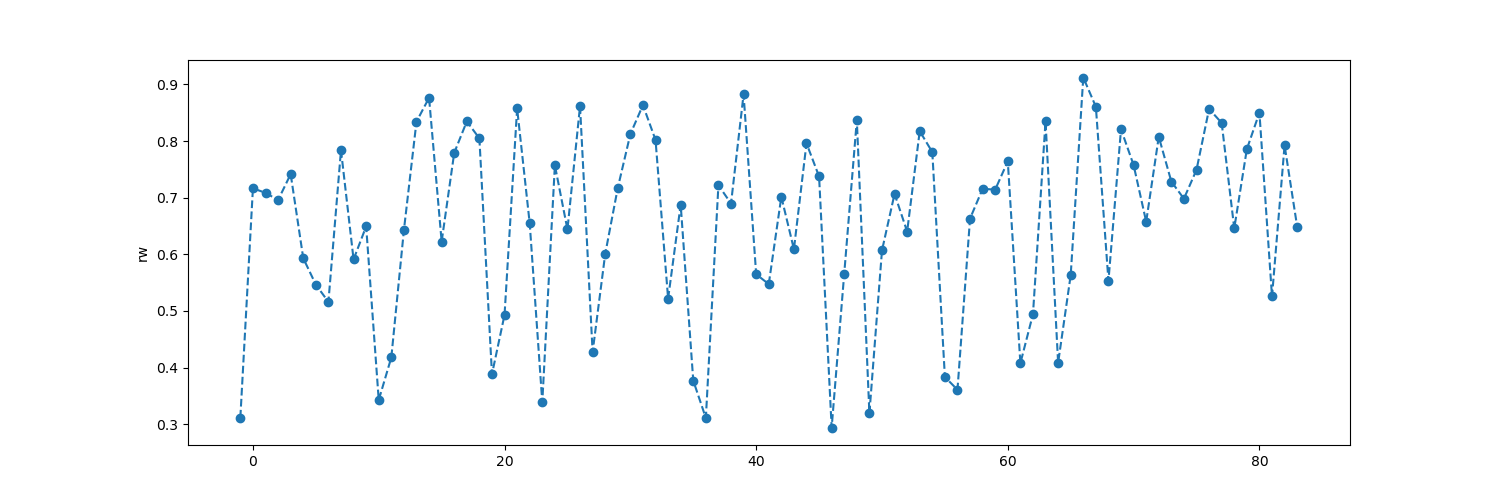

In [31]:
f = plt.figure(figsize=(15,5))
ax = f.gca()
ax.plot(idx, rw_list, 'o--')
ax.set_ylabel('rw')

## Re fitting

In [32]:
fn = '/Users/cheng-hunglin/Documents/Data_LDRD/Cs_x-Pb_y-B_z_serial_all6-1.ddp'
ddp_01 = LoadProject(fn)

In [33]:
len(ddp_01.getFits())

85

In [34]:
ddp_01.getFits()[0].datasets.keys()[0]

'Cs_033_Br_141_Pb_080_OLA_002_PF_021_Tol_1280_20250609-175317_8364d6_scattering-1_mean_q.gr'

In [35]:
ddp_01.getFits()[0].getData(1)

8.33287132836

In [36]:
# ddp_01.getFits()[0].parameters[1].fixed = False

In [37]:
failed_list = []
for i in range(len(ddp_01.getFits())):
    
    clear_output(wait=True)
    
    data_name = ddp_01.getFits()[i].datasets.keys()[0]
    print(f'{i = }\n')
    print(f'Data {data_name[:28]} fitting is on going\n')

    ## Free ADPs for fitting
    for k in [40, 41, 42, 50, 51, 52, 60, 61]:
        ddp_01.getFits()[i].parameters[k].fixed = False
    
    try:
        ddp_01.getFits()[i].run()

        print('\n')
        print('Update refined results to initial for the current dataset\n')
        for key, item in ddp_01.getFits()[i].parameters.items():
            refined = ddp_01.getFits()[i].getData(key)
            ddp_01.getFits()[i].parameters[key].setInitial(refined)

        # print('Update refined results to initial for the next dataset\n')
        # try:
        #     for key, item in new_guicontrol.fits[i].parameters.items():
        #         refined = new_guicontrol.fits[i].getData(key)
        #         new_guicontrol.fits[i+1].parameters[key].setInitial(refined)
        # except IndexError:
        #     pass
        
    except calculationError:
        ddp_01.getFits()[i].stop()
        failed_list.append(data_name)
        print(f'Data {data_name[:28]} fitting fialed\n')
        
        # print('Update refined resutls to initial for the next dataset from the previous one\n')
        # try:
        #     for key, item in new_guicontrol.fits[i-1].parameters.items():
        #         refined = new_guicontrol.fits[i-1].getData(key)
        #         new_guicontrol.fits[i+1].parameters[key].setInitial(refined)
        # except IndexError:
        #     pass
        
        tqdm_sleep_sec(30, message=f'fitting failed: {i = }, {data_name}')
    
    print('\n')
    time.sleep(3)

i = 84

Data Cs_180_Br_040_Pb_020_PF_020_ fitting is on going


******************************************************************************
*                      P D F F I T   Version   1.5.1                         *
*                                              2025-02-07                    *
* -------------------------------------------------------------------------- *
* (c) 1998-2007 Trustees of the Michigan State University.                   *
* (c) 2008-2025 Trustees of the Columbia University                          *
*               in the city of New York.                                     *
*                                                                            *
* Authors:                                                                   *
*     Thomas Proffen        -   Email: tproffen@lanl.gov                     *
*     Jacques Bloch         -   Email: bloch@pa.msu.edu                      *
*     Christopher Farrow    -   Email: clf2121@columbia.edu        

In [38]:
ddp_01.getFits()[i].stop()

In [40]:
subpath = '/Users/cheng-hunglin/Documents/Data_LDRD'
fn = 'Cs_x-Pb_y-B_z_serial_all6-2.ddp'
full_fn = os.path.join(subpath, fn)

ddp_01.save(full_fn)

In [41]:
failed_list

['Cs_000_Br_040_Pb_063_OLA_021_PF_010_Tol_620_20250608-193204_9d3865_scattering-1_mean_q.gr',
 'Cs_000_Br_142_Pb_091_OLA_006_PF_020_Tol_1200_20250608-185217_3486c9_scattering-1_mean_q.gr',
 'Cs_000_Br_143_Pb_093_OLA_000_PF_020_Tol_1182_20250608-205851_e5c3d6_scattering-1_mean_q.gr',
 'Cs_010_Br_136_Pb_093_OLA_000_PF_020_Tol_1195_20250608-173020_a5e8e9_scattering-1_mean_q.gr',
 'Cs_020_Br_040_Pb_180_PF_020_Tol_1200_20250606-215430_c1a394_scattering-1_mean_q.gr',
 'Cs_020_Br_070_Pb_022_OLA_000_PF_009_Tol_560_20250610-055108_9a2bf0_scattering-1_mean_q.gr',
 'Cs_020_Br_080_Pb_140_PF_020_Tol_1200_20250606-225646_a26ebc_scattering-1_mean_q.gr',
 'Cs_032_Br_091_Pb_099_OLA_008_PF_016_Tol_1150_20250609-024558_4208be_scattering-1_mean_q.gr',
 'Cs_035_Br_089_Pb_075_OLA_020_PF_016_Tol_1095_20250609-030556_3d7ab3_scattering-1_mean_q.gr',
 'Cs_035_Br_160_Pb_036_OLA_010_PF_020_Tol_1205_20250610-033002_c8114c_scattering-1_mean_q.gr',
 'Cs_041_Br_083_Pb_060_OLA_007_PF_014_Tol_955_20250609-022611_6b21cd